# Optimisation Case Study - Staff Planning

## CREATED BY:

#### SHALULA SINHA

#### METPALLI ANIKETH


In [1]:
# Importing Libraries 

import pandas as pd
import numpy as np
import math
from pyomo.environ import *

In [2]:
from __future__ import division
from pyomo.opt import SolverFactory

In [3]:
# Reading the data from Excel workbook

#Let's read the data according to the respective order of sheets given in the excel workbook

#Reading the data from DemandData sheet

demand_data = pd.read_excel("/Users/dranzer/Documents/upGrad/DS/Course-5-Business Requirements/M7-Optimisation Case Study/Staffing+Data.xlsx",sheet_name="DemandData")



In [4]:
demand_data.head()

,State,Month,Demand
0,A,Jan,5240
1,A,Feb,4878
2,A,Mar,5942
3,A,Apr,2297
4,A,May,1992


In [5]:
#Reading the data from StaffAvailability sheet

staff_avail = pd.read_excel("/Users/dranzer/Documents/upGrad/DS/Course-5-Business Requirements/M7-Optimisation Case Study/Staffing+Data.xlsx",sheet_name="StaffAvailability")



In [6]:
staff_avail.head()

,State,Month,LB,UB,StaffAvPer
0,A,Jan,0.70,0.90,0.81
1,A,Feb,0.65,0.85,0.76
2,A,Mar,0.70,0.80,0.75
3,A,Apr,0.75,0.85,0.80
4,A,May,0.70,0.85,0.78


In [7]:
#Reading the data from Cost sheet

cost = pd.read_excel("/Users/dranzer/Documents/upGrad/DS/Course-5-Business Requirements/M7-Optimisation Case Study/Staffing+Data.xlsx",sheet_name="Cost")


In [8]:

cost.head()


,State,Month,AnnualSalary,MonthlySalary,UnitOutSourceCost
0,A,Jan,60000,5000.0,180
1,A,Feb,60000,5000.0,180
2,A,Mar,60000,5000.0,180
3,A,Apr,60000,5000.0,180
4,A,May,60000,5000.0,180


In [9]:
#Reading the data from ServiceRate sheet

service_rate = pd.read_excel("/Users/dranzer/Documents/upGrad/DS/Course-5-Business Requirements/M7-Optimisation Case Study/Staffing+Data.xlsx",sheet_name="ServiceRate")


In [10]:
service_rate

,MgAppServedPerMonth
0,40


### Now that we have imported the data from the excel workbook into the pandas dataframes, let's now create dictionaries which will help us solve the problem statement. We can create these dictionaries from the respective dataframes by setting up the index values as KEYS and the others as VALUES.

## Data pre-processing 

In [11]:
# Create the required Python data structures for indexes and parameters

# Let's start by creating Dictionaries

In [12]:
#Let's create a dictionary for the DemandData dataframe

dict_demand = demand_data.set_index(['State','Month'])['Demand'].to_dict()


In [13]:
dict_demand

{('A', 'Jan'): 5240,
 ('A', 'Feb'): 4878,
 ('A', 'Mar'): 5942,
 ('A', 'Apr'): 2297,
 ('A', 'May'): 1992,
 ('A', 'Jun'): 2275,
 ('A', 'Jul'): 5334,
 ('A', 'Aug'): 3371,
 ('A', 'Sep'): 3759,
 ('A', 'Oct'): 3529,
 ('A', 'Nov'): 4284,
 ('A', 'Dec'): 5183,
 ('B', 'Jan'): 4927,
 ('B', 'Feb'): 2628,
 ('B', 'Mar'): 2974,
 ('B', 'Apr'): 2338,
 ('B', 'May'): 4020,
 ('B', 'Jun'): 3147,
 ('B', 'Jul'): 4271,
 ('B', 'Aug'): 2620,
 ('B', 'Sep'): 4517,
 ('B', 'Oct'): 4155,
 ('B', 'Nov'): 3137,
 ('B', 'Dec'): 4227,
 ('C', 'Jan'): 1162,
 ('C', 'Feb'): 1967,
 ('C', 'Mar'): 1898,
 ('C', 'Apr'): 2261,
 ('C', 'May'): 2030,
 ('C', 'Jun'): 1642,
 ('C', 'Jul'): 2489,
 ('C', 'Aug'): 2496,
 ('C', 'Sep'): 922,
 ('C', 'Oct'): 2421,
 ('C', 'Nov'): 963,
 ('C', 'Dec'): 1998}

In [14]:
#Let's create a dictionary for the FullTimeEquivalent employees with their Monthly Salaries from COST dataframe

dict_FTE_Salary = cost.set_index(['State','Month'])['MonthlySalary'].to_dict()



In [15]:
dict_FTE_Salary

{('A', 'Jan'): 5000.0,
 ('A', 'Feb'): 5000.0,
 ('A', 'Mar'): 5000.0,
 ('A', 'Apr'): 5000.0,
 ('A', 'May'): 5000.0,
 ('A', 'Jun'): 5000.0,
 ('A', 'Jul'): 5000.0,
 ('A', 'Aug'): 5000.0,
 ('A', 'Sep'): 5000.0,
 ('A', 'Oct'): 5000.0,
 ('A', 'Nov'): 5000.0,
 ('A', 'Dec'): 5000.0,
 ('B', 'Jan'): 4583.333333333333,
 ('B', 'Feb'): 4583.333333333333,
 ('B', 'Mar'): 4583.333333333333,
 ('B', 'Apr'): 4583.333333333333,
 ('B', 'May'): 4583.333333333333,
 ('B', 'Jun'): 4583.333333333333,
 ('B', 'Jul'): 4583.333333333333,
 ('B', 'Aug'): 4583.333333333333,
 ('B', 'Sep'): 4583.333333333333,
 ('B', 'Oct'): 4583.333333333333,
 ('B', 'Nov'): 4583.333333333333,
 ('B', 'Dec'): 4583.333333333333,
 ('C', 'Jan'): 4416.666666666667,
 ('C', 'Feb'): 4416.666666666667,
 ('C', 'Mar'): 4416.666666666667,
 ('C', 'Apr'): 4416.666666666667,
 ('C', 'May'): 4416.666666666667,
 ('C', 'Jun'): 4416.666666666667,
 ('C', 'Jul'): 4416.666666666667,
 ('C', 'Aug'): 4416.666666666667,
 ('C', 'Sep'): 4416.666666666667,
 ('C', 'Oc

In [16]:
#Let's create a dictionary for the OutSourced employees with their Unit Out Source Cost from COST dataframe

dict_OSE_UnitCost = cost.set_index(['State','Month'])['UnitOutSourceCost'].to_dict()


In [17]:

dict_OSE_UnitCost


{('A', 'Jan'): 180,
 ('A', 'Feb'): 180,
 ('A', 'Mar'): 180,
 ('A', 'Apr'): 180,
 ('A', 'May'): 180,
 ('A', 'Jun'): 180,
 ('A', 'Jul'): 180,
 ('A', 'Aug'): 180,
 ('A', 'Sep'): 180,
 ('A', 'Oct'): 180,
 ('A', 'Nov'): 180,
 ('A', 'Dec'): 180,
 ('B', 'Jan'): 150,
 ('B', 'Feb'): 150,
 ('B', 'Mar'): 150,
 ('B', 'Apr'): 150,
 ('B', 'May'): 150,
 ('B', 'Jun'): 150,
 ('B', 'Jul'): 150,
 ('B', 'Aug'): 150,
 ('B', 'Sep'): 150,
 ('B', 'Oct'): 150,
 ('B', 'Nov'): 150,
 ('B', 'Dec'): 150,
 ('C', 'Jan'): 160,
 ('C', 'Feb'): 160,
 ('C', 'Mar'): 160,
 ('C', 'Apr'): 160,
 ('C', 'May'): 160,
 ('C', 'Jun'): 160,
 ('C', 'Jul'): 160,
 ('C', 'Aug'): 160,
 ('C', 'Sep'): 160,
 ('C', 'Oct'): 160,
 ('C', 'Nov'): 160,
 ('C', 'Dec'): 160}

In [18]:
# Number of Applications when an FTE employee is working for 100 percent of his working days

FTE_ApplnServiceRate = service_rate.iloc[0,0]


In [19]:
FTE_ApplnServiceRate

40

In [20]:
#Let's now create dictionaries for the StaffAvailability dataframe

#Dictionary for the Lower Bound of Staff Availability

dict_StaffAvail_LB = staff_avail.set_index(['State','Month'])['LB'].to_dict()


In [21]:
dict_StaffAvail_LB

{('A', 'Jan'): 0.7,
 ('A', 'Feb'): 0.65,
 ('A', 'Mar'): 0.7,
 ('A', 'Apr'): 0.75,
 ('A', 'May'): 0.7,
 ('A', 'Jun'): 0.65,
 ('A', 'Jul'): 0.6,
 ('A', 'Aug'): 0.65,
 ('A', 'Sep'): 0.7,
 ('A', 'Oct'): 0.65,
 ('A', 'Nov'): 0.6,
 ('A', 'Dec'): 0.6,
 ('B', 'Jan'): 0.7,
 ('B', 'Feb'): 0.65,
 ('B', 'Mar'): 0.7,
 ('B', 'Apr'): 0.75,
 ('B', 'May'): 0.7,
 ('B', 'Jun'): 0.65,
 ('B', 'Jul'): 0.6,
 ('B', 'Aug'): 0.65,
 ('B', 'Sep'): 0.7,
 ('B', 'Oct'): 0.65,
 ('B', 'Nov'): 0.6,
 ('B', 'Dec'): 0.6,
 ('C', 'Jan'): 0.7,
 ('C', 'Feb'): 0.65,
 ('C', 'Mar'): 0.7,
 ('C', 'Apr'): 0.75,
 ('C', 'May'): 0.7,
 ('C', 'Jun'): 0.65,
 ('C', 'Jul'): 0.6,
 ('C', 'Aug'): 0.65,
 ('C', 'Sep'): 0.7,
 ('C', 'Oct'): 0.65,
 ('C', 'Nov'): 0.6,
 ('C', 'Dec'): 0.6}

In [22]:
#Dictionary for the Upper Bound of Staff Availability

dict_StaffAvail_UB = staff_avail.set_index(['State','Month'])['UB'].to_dict()



In [23]:
dict_StaffAvail_UB

{('A', 'Jan'): 0.9,
 ('A', 'Feb'): 0.85,
 ('A', 'Mar'): 0.8,
 ('A', 'Apr'): 0.85,
 ('A', 'May'): 0.85,
 ('A', 'Jun'): 0.8,
 ('A', 'Jul'): 0.75,
 ('A', 'Aug'): 0.85,
 ('A', 'Sep'): 0.9,
 ('A', 'Oct'): 0.8,
 ('A', 'Nov'): 0.75,
 ('A', 'Dec'): 0.7,
 ('B', 'Jan'): 0.9,
 ('B', 'Feb'): 0.85,
 ('B', 'Mar'): 0.8,
 ('B', 'Apr'): 0.85,
 ('B', 'May'): 0.85,
 ('B', 'Jun'): 0.8,
 ('B', 'Jul'): 0.75,
 ('B', 'Aug'): 0.85,
 ('B', 'Sep'): 0.9,
 ('B', 'Oct'): 0.8,
 ('B', 'Nov'): 0.75,
 ('B', 'Dec'): 0.7,
 ('C', 'Jan'): 0.9,
 ('C', 'Feb'): 0.85,
 ('C', 'Mar'): 0.8,
 ('C', 'Apr'): 0.85,
 ('C', 'May'): 0.85,
 ('C', 'Jun'): 0.8,
 ('C', 'Jul'): 0.75,
 ('C', 'Aug'): 0.85,
 ('C', 'Sep'): 0.9,
 ('C', 'Oct'): 0.8,
 ('C', 'Nov'): 0.75,
 ('C', 'Dec'): 0.7}

In [24]:
#Dictionary for the Average availability of an FTE (Full Time Employee equivalent) in percentages

dict_StaffAvailPer_FTE = staff_avail.set_index(['State','Month'])['StaffAvPer'].to_dict()


In [25]:
dict_StaffAvailPer_FTE

{('A', 'Jan'): 0.81,
 ('A', 'Feb'): 0.76,
 ('A', 'Mar'): 0.75,
 ('A', 'Apr'): 0.8,
 ('A', 'May'): 0.78,
 ('A', 'Jun'): 0.73,
 ('A', 'Jul'): 0.68,
 ('A', 'Aug'): 0.76,
 ('A', 'Sep'): 0.81,
 ('A', 'Oct'): 0.73,
 ('A', 'Nov'): 0.68,
 ('A', 'Dec'): 0.65,
 ('B', 'Jan'): 0.81,
 ('B', 'Feb'): 0.76,
 ('B', 'Mar'): 0.75,
 ('B', 'Apr'): 0.8,
 ('B', 'May'): 0.78,
 ('B', 'Jun'): 0.73,
 ('B', 'Jul'): 0.68,
 ('B', 'Aug'): 0.76,
 ('B', 'Sep'): 0.81,
 ('B', 'Oct'): 0.73,
 ('B', 'Nov'): 0.68,
 ('B', 'Dec'): 0.65,
 ('C', 'Jan'): 0.81,
 ('C', 'Feb'): 0.76,
 ('C', 'Mar'): 0.75,
 ('C', 'Apr'): 0.8,
 ('C', 'May'): 0.78,
 ('C', 'Jun'): 0.73,
 ('C', 'Jul'): 0.68,
 ('C', 'Aug'): 0.76,
 ('C', 'Sep'): 0.81,
 ('C', 'Oct'): 0.73,
 ('C', 'Nov'): 0.68,
 ('C', 'Dec'): 0.65}

#### We also need to extract the state(i) and the month(j) values because they are the indices. So, let's do that by extracting them from the cost dataframe. 

In [26]:
#Extracting the index values i.e., the state(i) and month(j) values

location_state = cost['State'].unique().tolist()     

month = cost['Month'].unique().tolist()


In [27]:
#Printing the location_state values 

location_state

['A', 'B', 'C']

In [28]:
#Printing the month values

month


['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

# Question 1

The company wants to know the optimised staffing recommendations for the business case described. 
Write the mathematical model for the deterministic optimisation problem. Define and explain your decision variables, objective function and the constraint. (Hint: Use months of the year as the model timeline).



**Sets:** 

To define the indexes for the given problem <br>
- Bank location : i
- Month : j

---


**Parameter:**
- State-wise demand for insurance for the year : Demand(i,j)
- Staff Availability percentage at particular location : StaffAv(i,j)
- Full Time Employee(FTE) Salary per month : FTESalary(i,j)
- Unit Outsourcing Cost : UnitOutSourceCost(i,j)
- Maximum number of Application that can be served by FTE per month : 40

---

**Decision Variable:**
- FTE Equivalent at any location in a month : X(i,j)
- Outsourced Application Quantity in a Month : Y(i,j)

---

**Objective Function:**

1) Annual Total Cost of FTE
   \begin{align}
 {X}_{i,j} * \text {FTESalary}_{i,j}
\end{align}
   
   
   
2) Annual Total Cost of Outsourced Insurance Application
\begin{align}
 {Y}_{i,j} * \text {UnitCost}_{i,j}
\end{align}




- Objective is to minimize the Total Cost(1+2):
\begin{align}
\textrm {min}\sum \limits _{i,j} \text ({X}_{i,j} * \text {FTESalary}_{i,j}) + ({Y}_{i,j} * \text {UnitCost}_{i,j})
\end{align}

---

**Constraint:**
- Sum of Full Time Equivalent Applications and the Outsourced Applications must be equal to Demand
   
   X(i,j) * StaffAv(i,j) * 40 + Y(i,j) = Demand(i,j)

  
  Regulatory Constraint

1) For State A outsourced insurance applications cannot be more than 30% of the total number of applications for each month.
   - Y(i,j) <= Demand(i,j) * 30%   
   
2) For State B outsourced insurance applications cannot be more than 40% of the total number of applications for each month.
   - Y(i,j) <= Demand(i,j) * 40%




- Y(i,j) should be Integer


- X(i,j) should be continous


**Note:** You can write the mathematical formulation directly in your report.

# Question 2

Code the problem is Python and use any optimization package to solve it. Add comments to your code to explain each step. 

#### Expected output:

Create a data frame containing the number of outsourced applications  and the number of FTEs for each state-month combination. You can choose to have extra columns like staff availability, demand etc. in your dataframe apart from the ones mentioned earlier. 

In [29]:
# Creating a model instance

model = ConcreteModel()


In [30]:
# Define Pyomo sets and Parameters


In [31]:
# Let's now define the Sets

# i --------> insurance company's locations A,B,C

# j --------> months Jan,Feb,Mar,....,Dec


model.i = Set(initialize = location_state, doc = 'States')

model.j = Set(initialize = month, doc = 'Months')





In [32]:
# Let's now define the parameters

In [33]:
#Let's start with defining the parameters for Demand


model.demand_par = Param(model.i, model.j, initialize=dict_demand, doc = 'Demand')



In [34]:
#Parameter for FTE_Salary

model.salaryFTE_par = Param(model.i,model.j,initialize=dict_FTE_Salary, doc = 'FTE_Salary')


In [35]:
#Parameter for OSE_UnitCost

model.unitcostOSE_par = Param(model.i,model.j,initialize=dict_OSE_UnitCost, doc = 'UnitOutSourceCost')


In [36]:
#Parameter for Staff_Availability_FTE

model.staffAvailFTE_par = Param(model.i,model.j,initialize=dict_StaffAvailPer_FTE, doc = 'Avg_StaffAvailability_FTE')



In [37]:
#Parameter for Service rate of application when all (100 percent) of the FTE Employees are working

model.rate_FTEAppService_par = Param(initialize=FTE_ApplnServiceRate, doc='FTEApplnServiceRate')



In [38]:
#Parameter for how many applications can be processed for the given staff availability

def function_FTEAPP(model,i,j):
    return model.rate_FTEAppService_par * model.staffAvailFTE_par[i,j]

model.FTEAppNumber = Param(model.i,model.j,initialize = function_FTEAPP, doc = 'Number_of_FTE_Applications')



In [39]:
#Regulatory Constraint for State A

def function_Reg_A(model,i,j):
    return 0.30*model.demand_par[i,j]

model.Reg_A = Param(model.i,model.j,initialize = function_Reg_A, doc = 'RegulatoryConstraint_Reg_A')



In [40]:
#Regulatory Constraint for State B

def function_Reg_B(model,i,j):
    return 0.40*model.demand_par[i,j]

model.Reg_B = Param(model.i,model.j,initialize = function_Reg_B, doc = 'RegulatoryConstraint_Reg_B')



In [41]:
# Decision variables

model.x = Var(model.i,model.j,domain = NonNegativeReals , doc = 'Number_of_FTE')

model.y = Var(model.i,model.j,domain = NonNegativeIntegers, doc = 'Number_of_OutSourced_Applications')



In [42]:
# Constraints

# Demand Constraint

model.demand_constraint = ConstraintList()

for i in model.i:
    for j in model.j:
        model.demand_constraint.add(expr = model.x[i,j]*model.FTEAppNumber[i,j] + model.y[i,j]==model.demand_par[i,j])
        



In [43]:
# Constraints

# Regulatory Constraint

model.regulatory_constraint = ConstraintList()

for i in model.i:
    for j in model.j:
        if i=='A':
            model.regulatory_constraint.add(expr = model.y['A',j] <= model.Reg_A['A',j])
        elif i=='B':
            model.regulatory_constraint.add(expr = model.y['B',j] <= model.Reg_B['B',j])
        



In [44]:
# Objective function

# Function for objective rule

def objective_rule(model):
    return sum(model.salaryFTE_par[i,j]*model.x[i,j] for i in model.i for j in model.j)+\
            sum(model.unitcostOSE_par[i,j]*model.y[i,j] for i in model.i for j in model.j)



In [45]:
#Objective function

model.objective = Objective(rule = objective_rule, sense = minimize, doc = 'DefineObjectiveFunction')



In [46]:
# Invoking the solver

result_cost = SolverFactory('glpk').solve(model)


In [47]:
#Solver Results

result_cost.write()


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 17962336.4487699
  Upper bound: 17962336.4487699
  Number of objectives: 1
  Number of constraints: 61
  Number of variables: 73
  Number of nonzeros: 97
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.013302087783813477
# ----------------------------------------------------------
#   Solution Information
# -----------

In [48]:
# Print the value of the objective function

model.pprint()

13 Set Declarations
    FTEAppNumber_index : Size=1, Index=None, Ordered=True
        Key  : Dimen : Domain : Size : Members
        None :     2 :    i*j :   36 : {('A', 'Jan'), ('A', 'Feb'), ('A', 'Mar'), ('A', 'Apr'), ('A', 'May'), ('A', 'Jun'), ('A', 'Jul'), ('A', 'Aug'), ('A', 'Sep'), ('A', 'Oct'), ('A', 'Nov'), ('A', 'Dec'), ('B', 'Jan'), ('B', 'Feb'), ('B', 'Mar'), ('B', 'Apr'), ('B', 'May'), ('B', 'Jun'), ('B', 'Jul'), ('B', 'Aug'), ('B', 'Sep'), ('B', 'Oct'), ('B', 'Nov'), ('B', 'Dec'), ('C', 'Jan'), ('C', 'Feb'), ('C', 'Mar'), ('C', 'Apr'), ('C', 'May'), ('C', 'Jun'), ('C', 'Jul'), ('C', 'Aug'), ('C', 'Sep'), ('C', 'Oct'), ('C', 'Nov'), ('C', 'Dec')}
    Reg_A_index : Size=1, Index=None, Ordered=True
        Key  : Dimen : Domain : Size : Members
        None :     2 :    i*j :   36 : {('A', 'Jan'), ('A', 'Feb'), ('A', 'Mar'), ('A', 'Apr'), ('A', 'May'), ('A', 'Jun'), ('A', 'Jul'), ('A', 'Aug'), ('A', 'Sep'), ('A', 'Oct'), ('A', 'Nov'), ('A', 'Dec'), ('B', 'Jan'), ('B', 'Feb'

In [49]:
# Display the number FTEs for each State every Month respectively

for i in location_state:
    for j in month:
        print("The number of FTEs at the location " + i + " in the month of " + j + " is ", model.x[i,j].value)




The number of FTEs at the location A in the month of Jan is  161.728395061728
The number of FTEs at the location A in the month of Feb is  160.460526315789
The number of FTEs at the location A in the month of Mar is  198.066666666667
The number of FTEs at the location A in the month of Apr is  71.78125
The number of FTEs at the location A in the month of May is  63.8461538461538
The number of FTEs at the location A in the month of Jun is  77.9109589041096
The number of FTEs at the location A in the month of Jul is  137.279411764706
The number of FTEs at the location A in the month of Aug is  110.888157894737
The number of FTEs at the location A in the month of Sep is  116.018518518519
The number of FTEs at the location A in the month of Oct is  120.856164383562
The number of FTEs at the location A in the month of Nov is  110.257352941176
The number of FTEs at the location A in the month of Dec is  139.576923076923
The number of FTEs at the location B in the month of Jan is  152.0679012

In [50]:
#Display the Number of Applications processed by the OutSourced Vendors for each State every Month respectively

for i in location_state:
    for j in month:
        print("The number of Applications processed by the OutSourced Vendors at the location " + i + " in the month of " + j + " is ", model.y[i,j].value)





The number of Applications processed by the OutSourced Vendors at the location A in the month of Jan is  0.0
The number of Applications processed by the OutSourced Vendors at the location A in the month of Feb is  0.0
The number of Applications processed by the OutSourced Vendors at the location A in the month of Mar is  0.0
The number of Applications processed by the OutSourced Vendors at the location A in the month of Apr is  0.0
The number of Applications processed by the OutSourced Vendors at the location A in the month of May is  0.0
The number of Applications processed by the OutSourced Vendors at the location A in the month of Jun is  0.0
The number of Applications processed by the OutSourced Vendors at the location A in the month of Jul is  1600.0
The number of Applications processed by the OutSourced Vendors at the location A in the month of Aug is  0.0
The number of Applications processed by the OutSourced Vendors at the location A in the month of Sep is  0.0
The number of Ap

In [51]:
# Print the total cost incurred for the company

# This is our expected solution

total_cost = model.objective.expr()

total_cost



17962336.448769882

**`Checkpoint 1:`** Seems like the company has to spend around 17.9 m$ in total for the application approval process.

### So, The total cost incurred for the company is 17962336 USD, i.e., around 18 Million

#### Data Frame for the Results

In [52]:
#Creating dataframe for the results

#Let's start by creating a list "staff_df" that contains the numbers of FTEs and the OutSourced Applications

#Creating an empty list

staff_df = []

for i in location_state:
    for j in month:
        #value for variable x
        x_value = model.x[i,j].value #This gives the number of FTEs
        #value for variable y
        y_value = model.y[i,j].value #This gives the number of OutSourced Applications
        staff_df.append([i,j,x_value,y_value])    #Appending the values to the created list    


In [53]:
#Let's now convert this list "staff_df" into a DataFrame

staff_df = pd.DataFrame(staff_df,columns=['State','Month','FTE','OutSourcedApps'])


In [54]:
#Printing the DataFrame that is created

staff_df.head()


,State,Month,FTE,OutSourcedApps
0,A,Jan,161.728395,0.0
1,A,Feb,160.460526,0.0
2,A,Mar,198.066667,0.0
3,A,Apr,71.781250,0.0
4,A,May,63.846154,0.0


#### LET'S CALCULATE THE AVERAGE FTE PER MONTH

In [55]:
# Let's first calculate the Total FTEs

total_FTE = staff_df['FTE'].sum()

total_FTE


3085.5084926258896

In [56]:
#Calculating the Average FTE per month

avg_FTE_permonth = (total_FTE/12).round(2)

avg_FTE_permonth


257.13

### NOTE 1.1 - The optimal number of staff members that the company InsurePlus needs for the insurance application approval process for the calendar year 2021 is **257.13**.

### So, let's round that off to **258** 


In [57]:
#Let's calculate the total application demand first

total_demand = demand_data['Demand'].sum()

total_demand


113294

#### LET'S CALCULATE THE PERCENTAGE OF OUTSOURCED APPLICATIONS

In [58]:
# let's now calculate the total OutSourced Applications

total_outsourced = staff_df['OutSourcedApps'].sum()

total_outsourced


20749.0

In [59]:
#Percentage of OutSourced Applications

percentage_OutSourced = ((total_outsourced/total_demand)*100).round(2)

percentage_OutSourced

18.31

### NOTE 1.2 - The percentage of OutSourced Applications under normal circumstances(neither best case nor worst case) is 18.31


#### LET'S CALCULATE THE PERCENTAGE OF APPLICATIONS PROCESSED BY STAFF (i.e., FTEs)

In [60]:
#Percentage of Applications processed by STAFF

print(100 - percentage_OutSourced)


81.69


#### LET'S NOW CALCULATE THE AVERAGE COST PER APPLICATION

In [61]:
#Calculating the Average cost per application

avg_cost_PerApp = total_cost/total_demand


avg_cost_PerApp


158.5462288273861


### NOTE 1.3 - The average cost per application under normal circumstances (neither best case nor worst case) is 158.54



In [62]:
#Printing the "staff_df" DataFrame that is created

staff_df.head()



,State,Month,FTE,OutSourcedApps
0,A,Jan,161.728395,0.0
1,A,Feb,160.460526,0.0
2,A,Mar,198.066667,0.0
3,A,Apr,71.781250,0.0
4,A,May,63.846154,0.0


## INSIGHTS - CASE 1

### Under Normal Circumstances , i.e., (Neither Worst Case not Best Case) - 

1. The optimal number of staff members that the company InsurePlus needs for the insurance application approval process for the calendar year 2021 is **257.13**.So, let's round that off to **258** 

2. The percentage of outsourcing is **18.31**

3. The average cost per application is **158.54**


# Question 3

#### Worst-case and best-case analysis based on the staffs' availability.

Assuming that the distribution is the same across all the states,

#### 3.1 Worst case analysis 

- 3.1.1 What is the optimal number of staff members for the worst case? 

- 3.1.2 What is the percentage of outsourcing for the worst case? 

- 3.1.3 What is the average cost per application for the worst case?


#### 3.2 Best case analysis 

- 3.2.1 What is the optimal number of staff members for the best case? 

- 3.2.2 What is the percentage of outsourcing for the best case? 

- 3.2.3 What is the average cost per application for the best case?


#### Expected output:

For each of the subtasks (3.1 and 3.2) create a data frame containing the number of outsourced applications and the number of FTEs for each state-month combination. You can choose to have extra columns like staff availability, demand etc. in your dataframe apart from the ones mentioned earlier. Also, print the overall average percentage of outsourced applications and the overall average cost per application. 

### 3.1 Worst Case Analysis 

#### 3.1.1 Optimal number of staff members

In [63]:
# Creating a model instance

model = ConcreteModel()


In [64]:
# Define Pyomo sets and Parameters


In [65]:
# Let's now define the Sets

# i --------> insurance company's locations A,B,C

# j --------> months Jan,Feb,Mar,....,Dec


model.i = Set(initialize = location_state, doc = 'States')

model.j = Set(initialize = month, doc = 'Months')





In [66]:
# Let's now define the parameters

In [67]:
#Let's start with defining the parameters for Demand


model.demand_par = Param(model.i, model.j, initialize=dict_demand, doc = 'Demand')



In [68]:
#Parameter for FTE_Salary

model.salaryFTE_par = Param(model.i,model.j,initialize=dict_FTE_Salary, doc = 'FTE_Salary')


In [69]:
#Parameter for OSE_UnitCost

model.unitcostOSE_par = Param(model.i,model.j,initialize=dict_OSE_UnitCost, doc = 'UnitOutSourceCost')


In [70]:
#Parameter for Staff_Availability_FTE

model.staffAvail_LB_par = Param(model.i,model.j,initialize=dict_StaffAvail_LB, doc = 'Avg_StaffAvailability_LB')



In [71]:
#Parameter for Service rate of application when all (100 percent) of the FTE Employees are working

model.rate_FTEAppService_par = Param(initialize=FTE_ApplnServiceRate, doc='FTEApplnServiceRate')



In [72]:
#Parameter for how many applications can be processed for the given staff availability

def function_FTEAPP_LB(model,i,j):
    return model.rate_FTEAppService_par * model.staffAvail_LB_par[i,j]

model.FTEAppNumber_LB = Param(model.i,model.j,initialize = function_FTEAPP_LB, doc = 'Staff_LB')



In [73]:
#Regulatory Constraint for State A

def function_Reg_A(model,i,j):
    return 0.30*model.demand_par[i,j]

model.Reg_A = Param(model.i,model.j,initialize = function_Reg_A, doc = 'RegulatoryConstraint_Reg_A')



In [74]:
#Regulatory Constraint for State B

def function_Reg_B(model,i,j):
    return 0.40*model.demand_par[i,j]

model.Reg_B = Param(model.i,model.j,initialize = function_Reg_B, doc = 'RegulatoryConstraint_Reg_B')



In [75]:
# Decision variables

model.x = Var(model.i,model.j,domain = NonNegativeReals , doc = 'Number_of_FTE')

model.y = Var(model.i,model.j,domain = NonNegativeIntegers, doc = 'Number_of_OutSourced_Applications')



In [76]:
# Constraints

# Demand Constraint

model.demand_constraint = ConstraintList()

for i in model.i:
    for j in model.j:
        model.demand_constraint.add(expr = model.x[i,j]*model.FTEAppNumber_LB[i,j] + model.y[i,j]==model.demand_par[i,j])
        



In [77]:
# Constraints

# Regulatory Constraint

model.regulatory_constraint = ConstraintList()

for i in model.i:
    for j in model.j:
        if i=='A':
            model.regulatory_constraint.add(expr = model.y['A',j] <= model.Reg_A['A',j])
        elif i=='B':
            model.regulatory_constraint.add(expr = model.y['B',j] <= model.Reg_B['B',j])
        



In [78]:
# Objective function

# Function for objective rule

def objective_rule(model):
    return sum(model.salaryFTE_par[i,j]*model.x[i,j] for i in model.i for j in model.j)+\
            sum(model.unitcostOSE_par[i,j]*model.y[i,j] for i in model.i for j in model.j)



In [79]:
#Objective function

model.objective = Objective(rule = objective_rule, sense = minimize, doc = 'ObjectiveFunction_LB')



In [80]:
# Invoking the solver

result_cost_LB = SolverFactory('glpk').solve(model)


In [81]:
#Solver Results

result_cost_LB.write()


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 19599482.5167888
  Upper bound: 19599482.5167888
  Number of objectives: 1
  Number of constraints: 61
  Number of variables: 73
  Number of nonzeros: 97
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.014768838882446289
# ----------------------------------------------------------
#   Solution Information
# -----------

In [82]:
# Print the value of the objective function

model.pprint()

13 Set Declarations
    FTEAppNumber_LB_index : Size=1, Index=None, Ordered=True
        Key  : Dimen : Domain : Size : Members
        None :     2 :    i*j :   36 : {('A', 'Jan'), ('A', 'Feb'), ('A', 'Mar'), ('A', 'Apr'), ('A', 'May'), ('A', 'Jun'), ('A', 'Jul'), ('A', 'Aug'), ('A', 'Sep'), ('A', 'Oct'), ('A', 'Nov'), ('A', 'Dec'), ('B', 'Jan'), ('B', 'Feb'), ('B', 'Mar'), ('B', 'Apr'), ('B', 'May'), ('B', 'Jun'), ('B', 'Jul'), ('B', 'Aug'), ('B', 'Sep'), ('B', 'Oct'), ('B', 'Nov'), ('B', 'Dec'), ('C', 'Jan'), ('C', 'Feb'), ('C', 'Mar'), ('C', 'Apr'), ('C', 'May'), ('C', 'Jun'), ('C', 'Jul'), ('C', 'Aug'), ('C', 'Sep'), ('C', 'Oct'), ('C', 'Nov'), ('C', 'Dec')}
    Reg_A_index : Size=1, Index=None, Ordered=True
        Key  : Dimen : Domain : Size : Members
        None :     2 :    i*j :   36 : {('A', 'Jan'), ('A', 'Feb'), ('A', 'Mar'), ('A', 'Apr'), ('A', 'May'), ('A', 'Jun'), ('A', 'Jul'), ('A', 'Aug'), ('A', 'Sep'), ('A', 'Oct'), ('A', 'Nov'), ('A', 'Dec'), ('B', 'Jan'), ('B', 'F

In [83]:
# Display the number Staff for each State every Month respectively

for i in location_state:
    for j in month:
        print("******* FOR THE WORST CASE *******")
        print("The number of Staff at the location " + i + " in the month of " + j + " is ", model.x[i,j].value)




******* FOR THE WORST CASE *******
The number of Staff at the location A in the month of Jan is  187.142857142857
******* FOR THE WORST CASE *******
The number of Staff at the location A in the month of Feb is  131.346153846154
******* FOR THE WORST CASE *******
The number of Staff at the location A in the month of Mar is  212.214285714286
******* FOR THE WORST CASE *******
The number of Staff at the location A in the month of Apr is  76.5666666666667
******* FOR THE WORST CASE *******
The number of Staff at the location A in the month of May is  71.1428571428571
******* FOR THE WORST CASE *******
The number of Staff at the location A in the month of Jun is  61.2692307692308
******* FOR THE WORST CASE *******
The number of Staff at the location A in the month of Jul is  155.583333333333
******* FOR THE WORST CASE *******
The number of Staff at the location A in the month of Aug is  90.7692307692308
******* FOR THE WORST CASE *******
The number of Staff at the location A in the month of

In [84]:
#Display the Number of Applications processed by the OutSourced Vendors for each State every Month respectively

for i in location_state:
    for j in month:
        print("******* FOR THE WORST CASE *******")
        print("The number of Applications processed by the OutSourced Vendors at the location " + i + " in the month of " + j + " is ", model.y[i,j].value)





******* FOR THE WORST CASE *******
The number of Applications processed by the OutSourced Vendors at the location A in the month of Jan is  0.0
******* FOR THE WORST CASE *******
The number of Applications processed by the OutSourced Vendors at the location A in the month of Feb is  1463.0
******* FOR THE WORST CASE *******
The number of Applications processed by the OutSourced Vendors at the location A in the month of Mar is  0.0
******* FOR THE WORST CASE *******
The number of Applications processed by the OutSourced Vendors at the location A in the month of Apr is  0.0
******* FOR THE WORST CASE *******
The number of Applications processed by the OutSourced Vendors at the location A in the month of May is  0.0
******* FOR THE WORST CASE *******
The number of Applications processed by the OutSourced Vendors at the location A in the month of Jun is  682.0
******* FOR THE WORST CASE *******
The number of Applications processed by the OutSourced Vendors at the location A in the month of

In [85]:
# Print the total cost incurred for the company

# This is our expected solution

total_cost_LB = model.objective.expr()

total_cost_LB



19599482.516788766

**`Checkpoint 2:`** The company has to spend around 19.6 m$ in total for the application approval process if the staffs are working with the minimum availability.

### So, the total cost incurred for the company in the worst case scenario is around 19599482 , i.e. around 19.59 Million

In [86]:
#Creating dataframe for the results

#Let's start by creating a list "staff_df_wc" that contains the numbers of FTEs and the OutSourced Applications

#Creating an empty list

staff_df_wc = []

for i in location_state:
    for j in month:
        #value for variable x
        x_value = model.x[i,j].value #This gives the number of FTEs
        #value for variable y
        y_value = model.y[i,j].value #This gives the number of OutSourced Applications
        staff_df_wc.append([i,j,x_value,y_value])    #Appending the values to the created list    


In [87]:
#Let's now convert this list "staff_df_wc" into a DataFrame

staff_df_wc = pd.DataFrame(staff_df_wc,columns=['State','Month','FTE_WC','OutSourcedApps'])


In [88]:
#Printing the DataFrame that is created

staff_df_wc.head()


,State,Month,FTE_WC,OutSourcedApps
0,A,Jan,187.142857,0.0
1,A,Feb,131.346154,1463.0
2,A,Mar,212.214286,0.0
3,A,Apr,76.566667,0.0
4,A,May,71.142857,0.0


#### LET'S CALCULATE THE AVERAGE FTE PER MONTH

In [89]:
# Let's first calculate the Total FTEs

total_FTE_wc = staff_df_wc['FTE_WC'].sum()

total_FTE_wc


2761.2709706959704

In [90]:
#Calculating the Average FTE per month

avg_FTE_permonth_wc = (total_FTE_wc/12).round(2)

avg_FTE_permonth_wc


230.11

### NOTE - For the Worst Case scenario , the optimal number of staff members that the company InsurePlus needs for the insurance application approval process is **230.11**.So, let's round that off to **231** 

In [91]:
#Let's calculate the total application demand first

total_demand_wc = demand_data['Demand'].sum()

total_demand_wc


113294

#### 3.1.2 Percentage of outsourced applications 

#### LET'S CALCULATE THE PERCENTAGE OF OUTSOURCED APPLICATIONS

In [92]:
# let's now calculate the total OutSourced Applications

total_outsourced_wc = staff_df_wc['OutSourcedApps'].sum()

total_outsourced_wc


39808.0

In [93]:
#Percentage of OutSourced Applications

percentage_OutSourced_wc = ((total_outsourced_wc/total_demand_wc)*100).round(2)

percentage_OutSourced_wc

35.14

### NOTE -  In the Worst Case , The percentage of OutSourced Applications is **35.14**

#### LET'S CALCULATE THE PERCENTAGE OF APPLICATIONS PROCESSED BY STAFF (i.e., FTEs)

In [94]:
#Percentage of Applications processed by STAFF

print(100 - percentage_OutSourced_wc)


64.86


#### 3.1.3 Average cost per application

#### LET'S NOW CALCULATE THE AVERAGE COST PER APPLICATION

In [95]:
#Calculating the Average cost per application

avg_cost_PerApp_wc = total_cost_LB/total_demand_wc


avg_cost_PerApp_wc


172.9966504562357

### NOTE -  For the Worst Case scenario , The average cost per application is **172.99**

## INSIGHTS - CASE 2 

### In the Worst Case : 

1. The optimal number of staff members that the company InsurePlus needs for the insurance application approval process is **230.11**.So, let's round that off to **231** 

2. The percentage of outsourcing is **35.14**

3. The average cost per application is **172.99**



### 3.2  Best Case Analysis 

#### 3.2.1 Optimal number of staff members


In [96]:
# Creating a model instance

model = ConcreteModel()


In [97]:
# Define Pyomo sets and Parameters


In [98]:
# Let's now define the Sets

# i --------> insurance company's locations A,B,C

# j --------> months Jan,Feb,Mar,....,Dec


model.i = Set(initialize = location_state, doc = 'States')

model.j = Set(initialize = month, doc = 'Months')





In [99]:
# Let's now define the parameters

In [100]:
#Let's start with defining the parameters for Demand


model.demand_par = Param(model.i, model.j, initialize=dict_demand, doc = 'Demand')



In [101]:
#Parameter for FTE_Salary

model.salaryFTE_par = Param(model.i,model.j,initialize=dict_FTE_Salary, doc = 'FTE_Salary')


In [102]:
#Parameter for OSE_UnitCost

model.unitcostOSE_par = Param(model.i,model.j,initialize=dict_OSE_UnitCost, doc = 'UnitOutSourceCost')


In [103]:
#Parameter for Staff_Availability_BestCase

model.staffAvail_UB_par = Param(model.i,model.j,initialize=dict_StaffAvail_UB, doc = 'Avg_StaffAvailability_UB')



In [104]:
#Parameter for Service rate of application when all (100 percent) of the FTE Employees are working

model.rate_FTEAppService_par = Param(initialize=FTE_ApplnServiceRate, doc='FTEApplnServiceRate')



In [105]:
#Parameter for how many applications can be processed for the given staff availability

def function_FTEAPP_UB(model,i,j):
    return model.rate_FTEAppService_par * model.staffAvail_UB_par[i,j]

model.FTEAppNumber_UB = Param(model.i,model.j,initialize = function_FTEAPP_UB, doc = 'Staff_LB')



In [106]:
#Regulatory Constraint for State A

def function_Reg_A(model,i,j):
    return 0.30*model.demand_par[i,j]

model.Reg_A = Param(model.i,model.j,initialize = function_Reg_A, doc = 'RegulatoryConstraint_Reg_A')



In [107]:
#Regulatory Constraint for State B

def function_Reg_B(model,i,j):
    return 0.40*model.demand_par[i,j]

model.Reg_B = Param(model.i,model.j,initialize = function_Reg_B, doc = 'RegulatoryConstraint_Reg_B')



In [108]:
# Decision variables

model.x = Var(model.i,model.j,domain = NonNegativeReals , doc = 'Number_of_FTE')

model.y = Var(model.i,model.j,domain = NonNegativeIntegers, doc = 'Number_of_OutSourced_Applications')



In [109]:
# Constraints

# Demand Constraint

model.demand_constraint = ConstraintList()

for i in model.i:
    for j in model.j:
        model.demand_constraint.add(expr = model.x[i,j]*model.FTEAppNumber_UB[i,j] + model.y[i,j]==model.demand_par[i,j])
        



In [110]:
# Constraints

# Regulatory Constraint

model.regulatory_constraint = ConstraintList()

for i in model.i:
    for j in model.j:
        if i=='A':
            model.regulatory_constraint.add(expr = model.y['A',j] <= model.Reg_A['A',j])
        elif i=='B':
            model.regulatory_constraint.add(expr = model.y['B',j] <= model.Reg_B['B',j])
        



In [111]:
# Objective function

# Function for objective rule

def objective_rule(model):
    return sum(model.salaryFTE_par[i,j]*model.x[i,j] for i in model.i for j in model.j)+\
            sum(model.unitcostOSE_par[i,j]*model.y[i,j] for i in model.i for j in model.j)



In [112]:
#Objective function

model.objective = Objective(rule = objective_rule, sense = minimize, doc = 'ObjectiveFunction_UB')



In [113]:
# Invoking the solver

result_cost_UB = SolverFactory('glpk').solve(model)


In [114]:
#Solver Results

result_cost_UB.write()


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 16527535.6379357
  Upper bound: 16527535.6379357
  Number of objectives: 1
  Number of constraints: 61
  Number of variables: 73
  Number of nonzeros: 97
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.015420913696289062
# ----------------------------------------------------------
#   Solution Information
# -----------

In [115]:
# Print the value of the objective function

model.pprint()

13 Set Declarations
    FTEAppNumber_UB_index : Size=1, Index=None, Ordered=True
        Key  : Dimen : Domain : Size : Members
        None :     2 :    i*j :   36 : {('A', 'Jan'), ('A', 'Feb'), ('A', 'Mar'), ('A', 'Apr'), ('A', 'May'), ('A', 'Jun'), ('A', 'Jul'), ('A', 'Aug'), ('A', 'Sep'), ('A', 'Oct'), ('A', 'Nov'), ('A', 'Dec'), ('B', 'Jan'), ('B', 'Feb'), ('B', 'Mar'), ('B', 'Apr'), ('B', 'May'), ('B', 'Jun'), ('B', 'Jul'), ('B', 'Aug'), ('B', 'Sep'), ('B', 'Oct'), ('B', 'Nov'), ('B', 'Dec'), ('C', 'Jan'), ('C', 'Feb'), ('C', 'Mar'), ('C', 'Apr'), ('C', 'May'), ('C', 'Jun'), ('C', 'Jul'), ('C', 'Aug'), ('C', 'Sep'), ('C', 'Oct'), ('C', 'Nov'), ('C', 'Dec')}
    Reg_A_index : Size=1, Index=None, Ordered=True
        Key  : Dimen : Domain : Size : Members
        None :     2 :    i*j :   36 : {('A', 'Jan'), ('A', 'Feb'), ('A', 'Mar'), ('A', 'Apr'), ('A', 'May'), ('A', 'Jun'), ('A', 'Jul'), ('A', 'Aug'), ('A', 'Sep'), ('A', 'Oct'), ('A', 'Nov'), ('A', 'Dec'), ('B', 'Jan'), ('B', 'F

In [116]:
# Display the number Staff for each State every Month respectively

for i in location_state:
    for j in month:
        print("******* FOR THE BEST CASE *******")
        print("The number of Staff at the location " + i + " in the month of " + j + " is ", model.x[i,j].value)




******* FOR THE BEST CASE *******
The number of Staff at the location A in the month of Jan is  145.555555555556
******* FOR THE BEST CASE *******
The number of Staff at the location A in the month of Feb is  143.470588235294
******* FOR THE BEST CASE *******
The number of Staff at the location A in the month of Mar is  185.6875
******* FOR THE BEST CASE *******
The number of Staff at the location A in the month of Apr is  67.5588235294118
******* FOR THE BEST CASE *******
The number of Staff at the location A in the month of May is  58.5882352941176
******* FOR THE BEST CASE *******
The number of Staff at the location A in the month of Jun is  71.09375
******* FOR THE BEST CASE *******
The number of Staff at the location A in the month of Jul is  177.8
******* FOR THE BEST CASE *******
The number of Staff at the location A in the month of Aug is  99.1470588235294
******* FOR THE BEST CASE *******
The number of Staff at the location A in the month of Sep is  104.416666666667
******* FO

In [117]:
#Display the Number of Applications processed by the OutSourced Vendors for each State every Month respectively

for i in location_state:
    for j in month:
        print("******* FOR THE BEST CASE *******")
        print("The number of Applications processed by the OutSourced Vendors at the location " + i + " in the month of " + j + " is ", model.y[i,j].value)





******* FOR THE BEST CASE *******
The number of Applications processed by the OutSourced Vendors at the location A in the month of Jan is  0.0
******* FOR THE BEST CASE *******
The number of Applications processed by the OutSourced Vendors at the location A in the month of Feb is  0.0
******* FOR THE BEST CASE *******
The number of Applications processed by the OutSourced Vendors at the location A in the month of Mar is  0.0
******* FOR THE BEST CASE *******
The number of Applications processed by the OutSourced Vendors at the location A in the month of Apr is  0.0
******* FOR THE BEST CASE *******
The number of Applications processed by the OutSourced Vendors at the location A in the month of May is  0.0
******* FOR THE BEST CASE *******
The number of Applications processed by the OutSourced Vendors at the location A in the month of Jun is  0.0
******* FOR THE BEST CASE *******
The number of Applications processed by the OutSourced Vendors at the location A in the month of Jul is  0.0

In [118]:
# Print the total cost incurred for the company

# This is our expected solution

total_cost_UB = model.objective.expr()

total_cost_UB



16527535.63793573

**`Checkpoint 3:`** The company has to spend around 16.5 m$ in total for the application approval process if the staffs are working with the maximum availability.

In [119]:
#Creating dataframe for the results

#Let's start by creating a list "staff_df_bc" that contains the numbers of FTEs and the OutSourced Applications

#Creating an empty list

staff_df_bc = []

for i in location_state:
    for j in month:
        #value for variable x
        x_value = model.x[i,j].value #This gives the number of FTEs
        #value for variable y
        y_value = model.y[i,j].value #This gives the number of OutSourced Applications
        staff_df_bc.append([i,j,x_value,y_value])    #Appending the values to the created list    


In [120]:
#Let's now convert this list "staff_df_bc" into a DataFrame

staff_df_bc = pd.DataFrame(staff_df_bc,columns=['State','Month','FTE_BC','OutSourcedApps'])


In [121]:
#Printing the DataFrame that is created

staff_df_bc.head()


,State,Month,FTE_BC,OutSourcedApps
0,A,Jan,145.555556,0.0
1,A,Feb,143.470588,0.0
2,A,Mar,185.687500,0.0
3,A,Apr,67.558824,0.0
4,A,May,58.588235,0.0


#### LET'S CALCULATE THE AVERAGE FTE PER MONTH

In [122]:
# Let's first calculate the Total FTEs

total_FTE_bc = staff_df_bc['FTE_BC'].sum()

total_FTE_bc


3343.189524976658

In [123]:
#Calculating the Average FTE per month

avg_FTE_permonth_bc = (total_FTE_bc/12).round(2)

avg_FTE_permonth_bc


278.6

### NOTE - For the Best Case, The optimal number of staff members that the company InsurePlus needs for the insurance application approval process is **278.6**.So, let's round that off to **279** 

In [124]:
#Let's calculate the total application demand first

total_demand_bc = demand_data['Demand'].sum()

total_demand_bc


113294

#### 3.2.2 Percentage of outsourced applications

#### LET'S CALCULATE THE PERCENTAGE OF OUTSOURCED APPLICATIONS

In [125]:
# let's now calculate the total OutSourced Applications

total_outsourced_bc = staff_df_bc['OutSourcedApps'].sum()

total_outsourced_bc


4652.0

In [126]:
#Percentage of OutSourced Applications

percentage_OutSourced_bc = ((total_outsourced_bc/total_demand_bc)*100).round(2)

percentage_OutSourced_bc

4.11

### NOTE - For the Best Case, The percentage of OutSourced Applications is 4.11

#### LET'S CALCULATE THE PERCENTAGE OF APPLICATIONS PROCESSED BY STAFF (i.e., FTEs)

In [127]:
#Percentage of Applications processed by STAFF

print(100 - percentage_OutSourced_bc)


95.89


#### 3.2.3 Average cost per application

#### LET'S NOW CALCULATE THE AVERAGE COST PER APPLICATION

In [128]:
#Calculating the Average cost per application

avg_cost_PerApp_bc = total_cost_UB/total_demand_bc

avg_cost_PerApp_bc


145.88182638035315

### NOTE - For the Best Case, The average cost per application is **145.88**

## INSIGHTS - CASE 3

### In the Best Case : 

1. The optimal number of staff members that the company InsurePlus needs for the insurance application approval process is **278.6**.So, let's round that off to **279** 

2. The percentage of outsourcing is **4.11**

3. The average cost per application is **145.88**




## WRITING DATA IN ALL THE DATA FRAMES CREATED INTO EXCEL  

#### LET'S NOW WRITE THE RESULTS INTO AN EXCEL SPREADSHEET

In [129]:
# Writing the results in to an Excel sheet
# Writing the data in the dataframe to an excel sheet

writer = pd.ExcelWriter('output.xlsx', engine='xlsxwriter')
staff_df.to_excel(writer, sheet_name='Sheet1')
staff_df_wc.to_excel(writer, sheet_name='Worst_Case')
staff_df_bc.to_excel(writer, sheet_name='Best_Case')

writer.save()




# Question 4

#### Creating Visualisations

Create the following visualisations using your preferred method (i.e. Python, PowerPoint, Power BI, etc.) and add it to your report. 

Use the solution of Q2 to create a stacked column chart that shows the percentage of applications processed by the staff and by the vendor for each month (%staff processed applications+ %vendor processed applications should add up to 100%). 
Create a graph to show how the cost per application increases with respect to any change in the parameters in your analysis.
Hint: Use the cost per application that you calculate in Questions 2 and 3 (i.e., the best case, and the worst case). 

**Note:** You can create the charts in Python or some other visualisation tools and make it a part of your final report directly.

### Let's now analyze the results in Question 2 and Question 3 

### QUESTION 4.1

In [130]:
#Print the dataframe for demand

demand_data.head()


,State,Month,Demand
0,A,Jan,5240
1,A,Feb,4878
2,A,Mar,5942
3,A,Apr,2297
4,A,May,1992



#### LET'S CALCULATE THE TOTAL MONTHLY DEMAND


In [131]:
#Let's calculate the monthly total application demand 

total_application_demand_2 = demand_data.groupby(['Month'])['Demand'].sum()

total_application_demand_2


Month
Apr     6896
Aug     8487
Dec    11408
Feb     9473
Jan    11329
Jul    12094
Jun     7064
Mar    10814
May     8042
Nov     8384
Oct    10105
Sep     9198
Name: Demand, dtype: int64

In [132]:
#Print the dataframe for staff

staff_df.head()


,State,Month,FTE,OutSourcedApps
0,A,Jan,161.728395,0.0
1,A,Feb,160.460526,0.0
2,A,Mar,198.066667,0.0
3,A,Apr,71.781250,0.0
4,A,May,63.846154,0.0



#### LET'S CALCULATE THE NUMBER OF APPLICATIONS PROCESSED BY STAFF



In [133]:
#Let's calculate the Monthly Staff Processed Applications

total_staff_applications_month = staff_df.groupby(['Month'])['FTE'].sum()

total_staff_applications_month


Month
Apr    215.500000
Aug    244.703947
Dec    237.153846
Feb    277.039474
Jan    349.660494
Jul    231.507353
Jun    198.835616
Mar    320.833333
May    257.756410
Nov    179.485294
Oct    289.143836
Sep    283.888889
Name: FTE, dtype: float64


#### LET'S CALCULATE THE PERCENTAGE OF APPLICATIONS PROCESSED BY STAFF


In [134]:
#calculate the Percentage of Applications processed by Staff

percentage_staff_applications_monthly = (total_staff_applications_month/total_application_demand_2)*100

percentage_staff_applications_monthly

Month
Apr    3.125000
Aug    2.883280
Dec    2.078838
Feb    2.924517
Jan    3.086420
Jul    1.914233
Jun    2.814774
Mar    2.966833
May    3.205128
Nov    2.140807
Oct    2.861394
Sep    3.086420
dtype: float64

#### LET'S CALCULATE THE NUMBER OF OUTSOURCED APPLICATIONS

In [135]:
# let's now calculate the total OutSourced Applications per month

total_outsourced_applications_month = staff_df.groupby(['Month'])['OutSourcedApps'].sum()

total_outsourced_applications_month



Month
Apr       0.0
Aug    1048.0
Dec    5242.0
Feb    1051.0
Jan       0.0
Jul    5797.0
Jun    1258.0
Mar    1189.0
May       0.0
Nov    3502.0
Oct    1662.0
Sep       0.0
Name: OutSourcedApps, dtype: float64

#### LET'S CALCULATE THE PERCENTAGE OF OUTSOURCED APPLICATIONS

In [136]:

#calculate the Percentage of Applications processed by Staff

percentage_outsourced_applications_monthly = (total_outsourced_applications_month/total_application_demand_2)*100

percentage_outsourced_applications_monthly



Month
Apr     0.000000
Aug    12.348297
Dec    45.950210
Feb    11.094690
Jan     0.000000
Jul    47.932859
Jun    17.808607
Mar    10.995006
May     0.000000
Nov    41.770038
Oct    16.447303
Sep     0.000000
dtype: float64

### Let's convert these percentage outsourced applications per month and percentage staff application per month series' into dataframes


In [137]:
#Let's convert the percentage of staff application per month series into dataframe

percentage_staff_applications_monthly = percentage_staff_applications_monthly.to_frame()

percentage_staff_applications_monthly


,0
Month,
Apr,3.125000
Aug,2.883280
Dec,2.078838
Feb,2.924517
Jan,3.086420
Jul,1.914233
Jun,2.814774
Mar,2.966833
May,3.205128


In [138]:
#Let's rename the percentage of staff application per month series to "Staff_%"

percentage_staff_applications_monthly = percentage_staff_applications_monthly.rename(columns={percentage_staff_applications_monthly.columns[0]: 'Staff_%'})

percentage_staff_applications_monthly


,Staff_%
Month,
Apr,3.125000
Aug,2.883280
Dec,2.078838
Feb,2.924517
Jan,3.086420
Jul,1.914233
Jun,2.814774
Mar,2.966833
May,3.205128


In [139]:
#Let's convert the percentage of OutSourced application per month series into dataframe

percentage_outsourced_applications_monthly = percentage_outsourced_applications_monthly.to_frame()

percentage_outsourced_applications_monthly


,0
Month,
Apr,0.000000
Aug,12.348297
Dec,45.950210
Feb,11.094690
Jan,0.000000
Jul,47.932859
Jun,17.808607
Mar,10.995006
May,0.000000


In [140]:
#Let's rename the percentage of OutSourced application per month series to "OutSourced_%"

percentage_outsourced_applications_monthly = percentage_outsourced_applications_monthly.rename(columns={percentage_outsourced_applications_monthly.columns[0]: 'OutSourced_%'})

percentage_outsourced_applications_monthly



,OutSourced_%
Month,
Apr,0.000000
Aug,12.348297
Dec,45.950210
Feb,11.094690
Jan,0.000000
Jul,47.932859
Jun,17.808607
Mar,10.995006
May,0.000000


In [141]:

# Let's Merge the data frames

df_merge = pd.concat([percentage_staff_applications_monthly, percentage_outsourced_applications_monthly], axis=1)

df_merge


,Staff_%,OutSourced_%
Month,,
Apr,3.125000,0.000000
Aug,2.883280,12.348297
Dec,2.078838,45.950210
Feb,2.924517,11.094690
Jan,3.086420,0.000000
Jul,1.914233,47.932859
Jun,2.814774,17.808607
Mar,2.966833,10.995006
May,3.205128,0.000000


<Figure size 7200x7200 with 0 Axes>

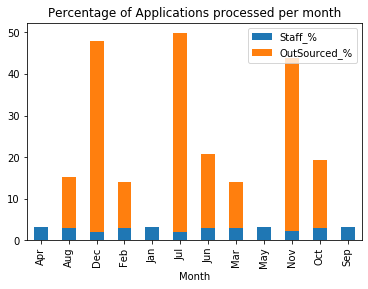

In [142]:
#Let's plot the stacked bar chart of the dataframe "df_merge"

import matplotlib.pyplot as plt

plt.figure(figsize=(100,100))

df_merge.plot( kind='bar', stacked=True, title='Percentage of Applications processed per month')

plt.show()


### INSIGHTS:


1. As you can see, the graph shows that the months of April, January, May, and September have 0 percent OutSourced Applications

2. They month of July has the highest percentage of OutSourced Applications followed by the month of December.


### QUESTION 4.2

### COST PER APPLICATION FOR ACTUAL, WORST CASE , AND BEST CASES

In [143]:
#Average cost per applications for all the 3 cases


print ("The average cost per application in the actual case is = ",avg_cost_PerApp)
print("\n")
print ("The average cost per application in the worst case is = ",avg_cost_PerApp_wc)
print("\n")
print ("The average cost per application in the best case is = ",avg_cost_PerApp_bc)
print("\n")

The average cost per application in the actual case is =  158.5462288273861


The average cost per application in the worst case is =  172.9966504562357


The average cost per application in the best case is =  145.88182638035315




In [144]:
#Create a new data frame df with the columns 'Actual_Case','Worst_Case','Best_Case'


df = pd.DataFrame(columns = ['Actual_Case','Worst_Case','Best_Case'])

# Add records to dataframe using the .loc function

df.loc[0] = [avg_cost_PerApp,avg_cost_PerApp_wc,avg_cost_PerApp_bc]

df


,Actual_Case,Worst_Case,Best_Case
0,158.546229,172.99665,145.881826


<Figure size 7200x7200 with 0 Axes>

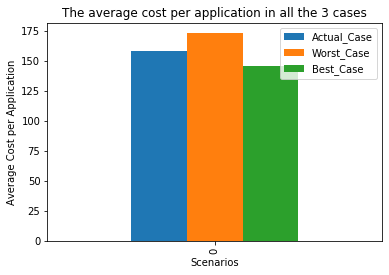

In [145]:
import matplotlib.pyplot as plt

plt.figure(figsize=(100,100))

df.plot( kind='bar', title='The average cost per application in all the 3 cases')

plt.xlabel("Scenarios")

plt.ylabel("Average Cost per Application")

plt.show()



### INSIGHT

1. The average cost per application in the actual case is =  158.5462288273861
2. The average cost per application in the worst case is =  172.9966504562357
3. The average cost per application in the best case is =  145.88182638035315

- As you can infer from the bar graph, the average cost per application is the highest for the **Worst Case**, which is followed by the **Actual Case**.

- The Average cost of application is the least for the **Best Case** scenario as expected.
